In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [40]:
data = pd.read_csv('data/measurements.csv')

In [41]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [43]:
data = data.drop(columns=['specials', 'refill liters', 'refill gas'], axis=1)

In [44]:
data = data.dropna()

In [54]:
data["distance"]=data["distance"].str.replace(',','.')
data["consume"]=data["consume"].str.replace(',','.')
data["temp_inside"]=data["temp_inside"].str.replace(',','.')

In [59]:
data['distance'] = data['distance'].astype('float32')
data['consume'] = data['consume'].astype('float32')
data['temp_inside'] = data['temp_inside'].astype('float32')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float32
 1   consume       376 non-null    float32
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    float32
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    object 
 6   AC            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float32(3), int64(5), object(1)
memory usage: 33.1+ KB


In [65]:
data1 = data[data['gas_type']!='E10'].drop(axis=1, columns=['gas_type'])
data2 = data[data['gas_type']=='E10'].drop(axis=1, columns=['gas_type'])

In [62]:
data1.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.112567,0.525427,0.049881,0.063281,-0.050153,0.008601,0.110364
consume,-0.112567,1.000000,-0.239446,-0.192928,-0.321460,0.119069,0.252322,-0.179898
speed,0.525427,-0.239446,1.000000,0.075987,-0.007323,-0.103785,0.006994,0.054851
temp_inside,0.049881,-0.192928,0.075987,1.000000,0.355781,0.297066,-0.071976,0.221183
temp_outside,0.063281,-0.321460,-0.007323,0.355781,1.000000,0.199057,-0.253271,0.411327
AC,-0.050153,0.119069,-0.103785,0.297066,0.199057,1.000000,0.202705,0.046509
rain,0.008601,0.252322,0.006994,-0.071976,-0.253271,0.202705,1.000000,-0.128733
sun,0.110364,-0.179898,0.054851,0.221183,0.411327,0.046509,-0.128733,1.000000


In [63]:
data2.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.175056,0.635782,0.160421,0.158487,0.045817,-0.073404,0.024366
consume,-0.175056,1.000000,-0.241686,-0.070185,-0.316287,0.039418,0.244257,-0.146649
speed,0.635782,-0.241686,1.000000,0.034912,0.101311,0.124739,-0.003089,0.121610
temp_inside,0.160421,-0.070185,0.034912,1.000000,0.417116,0.308706,0.058411,0.338053
temp_outside,0.158487,-0.316287,0.101311,0.417116,1.000000,0.052301,-0.094389,0.234066
AC,0.045817,0.039418,0.124739,0.308706,0.052301,1.000000,0.335263,0.182508
rain,-0.073404,0.244257,-0.003089,0.058411,-0.094389,0.335263,1.000000,-0.092464
sun,0.024366,-0.146649,0.121610,0.338053,0.234066,0.182508,-0.092464,1.000000


In [64]:
y = data['gas_type']
X = data.drop(axis=1, columns=['gas_type'])

In [72]:
y1 = data1['consume']
X1 = data1.drop(axis=1, columns=['consume'])
y2 = data2['consume']
X2 = data2.drop(axis=1, columns=['consume'])

In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=420)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=420)

In [74]:
model1 = LinearRegression().fit(X1_train, y1_train)
model2 = LinearRegression().fit(X2_train, y2_train)

In [77]:
model1.score(X1_test, y1_test)

0.10129687117519226

In [78]:
model2.score(X1_test, y1_test)

0.22684250237894887

AttributeError: 'Line2D' object has no property 'mark'

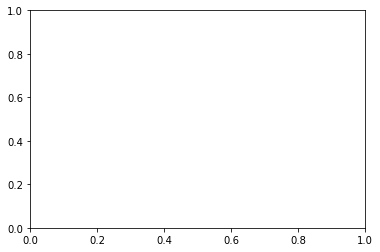

In [85]:
data1[['consume', 'speed']].plot(x = 'consume', y='speed', mark = 'o' )

<AxesSubplot:xlabel='consume'>

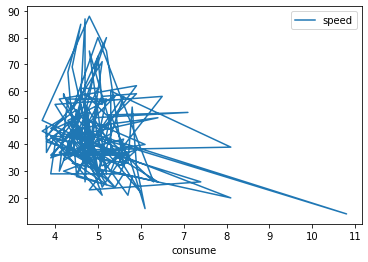

In [83]:
data2[['consume', 'speed']].plot(x = 'consume', y='speed', )